# Preprocessing 

In [34]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer as si
from sklearn.preprocessing import LabelEncoder, MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [35]:
# Loading the dataset
data = pd.read_csv("Cancer_Data.csv")
display(data.head(n=100))

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,...,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890,M
1,842517,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902,M
2,84300903,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758,M
3,84348301,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,...,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300,M
4,84358402,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,86208,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,0.2095,...,31.59,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689,0.08368,M
96,86211,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,0.1900,...,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376,B
97,862261,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,0.1350,...,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988,B
98,862485,11.600,12.84,74.34,412.6,0.08983,0.07525,0.041960,0.033500,0.1620,...,17.16,82.96,512.5,0.1431,0.18510,0.19220,0.08449,0.2772,0.08756,B


In [36]:
# Divide the data into input and output
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [37]:
# Replace missing data with the average of the columns values
imputer = si(missing_values=np.nan,strategy='mean')

x=imputer.fit_transform(x)

In [38]:
# Encoding the output to 0s and 1s
lb=LabelEncoder()
y=lb.fit_transform(y)

In [39]:
# Scaling the input 
sc=MinMaxScaler()
x[:,1:]=sc.fit_transform(x[:,1:])

In [40]:
# Splitting the dataset into the Training set and Test set
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.8,random_state=0)

In [41]:
# Importing the models libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

random = RandomForestClassifier(random_state=0)
DT = DecisionTreeClassifier(random_state=0)
Naive = GaussianNB()
KNN = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)

clfs = {"Random Forest":random, "Decision Tree":DT, "Naive Bayes":Naive, "KNN":KNN}
pred = {}
cm = {}

for name, clf in clfs.items():
    # Fitiing
    clf.fit(x_train, y_train)
    
    # Prediction
    pred[name] = clf.predict(x_test)
    
    # Making the Confusion Matrix
    cm[name] = confusion_matrix(y_test, pred[name])
    
for name, cm in (cm.items()):
    print(name, '\n', cm, "\n")

Random Forest 
 [[66  1]
 [ 2 45]] 

Decision Tree 
 [[59  8]
 [ 3 44]] 

Naive Bayes 
 [[66  1]
 [45  2]] 

KNN 
 [[56 11]
 [29 18]] 



C:\Users\Menna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Menna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Menna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Menna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

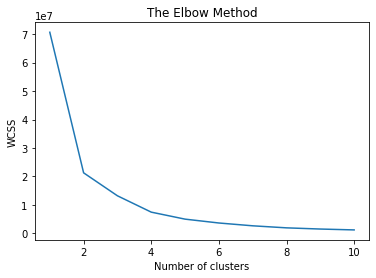

In [42]:
# K-Means Clustering
import matplotlib.pyplot as plt

# Importing the dataset
X = data.iloc[:, [3, 4]].values

# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)  
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Visualizing the results    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

C:\Users\Menna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


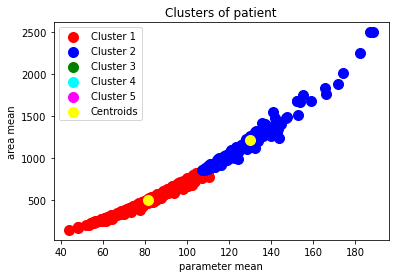

In [43]:
# Importing the library
from sklearn.cluster import KMeans

# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 2, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of patient')
plt.xlabel('parameter mean')
plt.ylabel('area mean')
plt.legend()
plt.show()